<a href="https://colab.research.google.com/github/jyosa/MachineLearning001/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Categorización de Estilos Musicales Mediante Técnicas de Aprendizaje Automático**

##Cómo Funciona el Agrupamiento en Aprendizaje Automático:

**Definición de Clusters:** El algoritmo identifica conjuntos de datos con características similares. Estos conjuntos, conocidos como clusters, se forman de manera que los datos dentro de cada cluster son muy similares entre sí y diferentes a los datos en otros clusters.

**Elección del Algoritmo:** Existen varios algoritmos de clustering, y la elección depende de la naturaleza de los datos y el objetivo del análisis. Algunos de los algoritmos más conocidos son K-Means, Clustering Jerárquico, DBSCAN, etc.
En algunos algoritmos por ejemplo, en K-Means, el proceso comienza seleccionando puntos aleatorios como centros de los clusters, llamados centroides.
Cada punto de datos se asigna a un cluster basándose en ciertos criterios, como la distancia mínima al centroide en el caso de K-Means.
Los centroides se ajustan y los puntos se reasignan a los clusters hasta que el algoritmo converge, es decir, hasta que los centroides no cambian o los cambios son mínimos.

Aquí vamos a realizar un análisis de clúster de géneros musicales. Se proporciona un conjunto de datos de canciones populares en Spotify, que contiene artistas y nombres de música con todas las características de audio de cada canción. El objetivo es agrupar los géneros musicales basándose en las similitudes de sus características de audio.

Los datos los puede bajar desde [aquí](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset/download), debe iscribirse a Kaggle inicialmente para poder acceder a los datos.

Coloca los datos en el drive de google.




In [4]:
# Importing necessary libraries
import pandas as pd  # Pandas library for data manipulation and analysis
import numpy as np   # Numpy library for numerical operations
from sklearn import cluster  # Importing cluster module from sklearn for clustering tasks

# Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/Spotify-2000.csv")  # Loading data from a CSV file named "Spotify-2000.csv" into a Pandas DataFrame
print(data.head())  # Printing the first five rows of the DataFrame to get a preview of the data


   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

Puedes ver todas las columnas del conjunto de datos en el resultado anterior. Contiene todas las características de audio de la música que son suficientes para encontrar similitudes. Antes de continuar, se eliminará la columna de índice que no vamos a usar, también s revisará registros duplicados, sin datdos o con NaN y se eliminarán:

data.dropna(inplace=True) elimina todas las filas con valores NaN. El argumento inplace=True asegura que los cambios se apliquen directamente al DataFrame.

data.drop_duplicates(inplace=True) elimina las filas duplicadas del DataFrame, aplicando nuevamente los cambios directamente al DataFrame.

Después de estas operaciones, el DataFrame data estará libre de filas con datos vacíos, duplicados y valores NaN. Opcionalmente, el código imprime las primeras cinco filas del DataFrame limpio para verificar los cambios.

In [5]:
# Data Cleaning
data = data.drop("Index", axis=1)
data.dropna(inplace=True)  # Deleting rows with NaN values
data.drop_duplicates(inplace=True)  # Deleting duplicate rows

# Optionally, you can print the DataFrame again to see the changes
print(data.head())  # Printing the first five rows of the cleaned DataFrame


                    Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0       68            

Ahora echemos un vistazo a la correlación entre todas las características de audio en el conjunto de datos:

<ipython-input-5-525bc9e84c6c>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


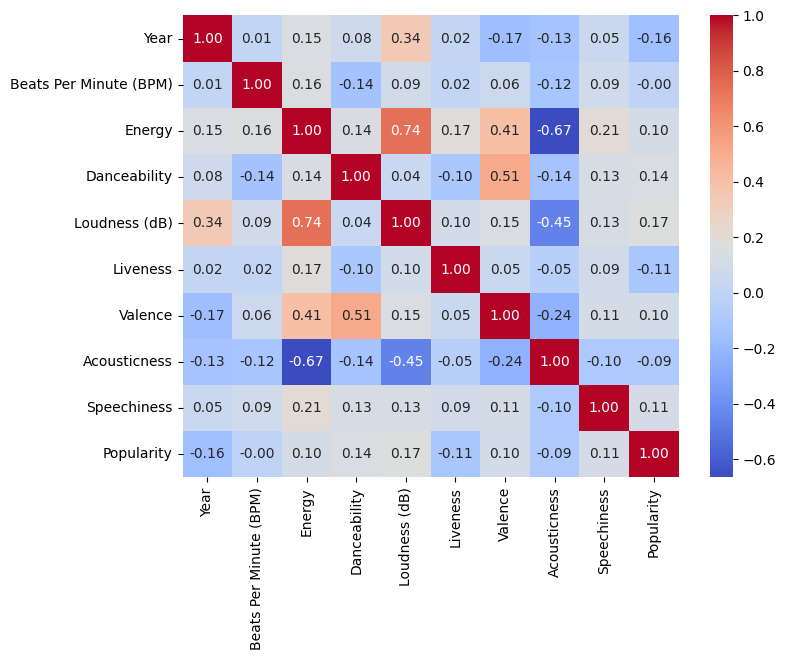

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Calculating the correlation matrix
corr = data.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(8, 6))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

# Display the heatmap
plt.show()


Este código realizará lo siguiente:

Calcular la matriz de correlación de tu DataFrame usando data.corr().
Configurar una figura de matplotlib con un tamaño especificado.
Utilizar la función heatmap de seaborn para crear un mapa de calor. El argumento annot=True anotará cada celda con el coeficiente de correlación. fmt=".2f" formatea estos coeficientes a dos decimales. El argumento cmap='coolwarm' establece el esquema de colores.
Mostrar el mapa de calor con plt.show().

El mapa de calor que muestra la matriz de correlación entre diferentes características de audio de canciones. Las correlaciones varían de -1 a 1, donde 1 es una correlación positiva perfecta, 0 significa que no hay correlación y -1 indica una correlación negativa perfecta.

En el mapa de calor:

Los colores más cálidos (rojos) indican una correlación positiva más fuerte.
Los colores más fríos (azules) indican una correlación negativa.
Los colores neutros (blanco o azul claro) sugieren una correlación baja o inexistente.

Algunas observaciones que podemos destacar son:

Energía y Volumen (Loudness) tienen una fuerte correlación positiva (0.74), lo que sugiere que las canciones con mayor energía tienden a ser más ruidosas.
Acousticness y Energía presentan una correlación negativa significativa (-0.67), lo que podría indicar que las canciones más acústicas suelen tener menos energía.
Acousticness y Volumen también muestran una correlación negativa notable (-0.45), posiblemente implicando que las canciones más acústicas tienden a ser menos ruidosas.
Valence y Danceability tienen una correlación positiva moderada (0.51), lo que puede indicar que las canciones que generan sentimientos más positivos son más bailables.
Popularidad parece tener muy poca o ninguna correlación significativa con la mayoría de las características de audio, como se refleja en los valores cercanos a cero.

Este tipo de análisis es útil para entender cómo se relacionan las características de audio entre sí y puede ser utilizado para informar el proceso de agrupamiento de géneros musicales o la recomendación de canciones basada en las características de audio.

Análisis de Agrupamiento de Características de Audio

Ahora se usará el algoritmo de agrupamiento K-means para encontrar las similitudes entre todas las características de audio. Luego, se añadirán clusters al conjunto de datos basados en las similitudes que encontramos. Así que se va a crear un nuevo conjunto de datos con todas las características de audio y realizar un análisis de agrupamiento utilizando el algoritmo de agrupamiento K-means:

In [6]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a new DataFrame containing only the relevant audio features
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data2 DataFrame and transform the data
data2_scaled = scaler.fit_transform(data2)

# Create an instance of the KMeans class with 10 clusters and n_init set to 10
kmeans = KMeans(n_clusters=10, n_init=10)

# Perform clustering on the scaled data and predict the cluster index for each sample
clusters = kmeans.fit_predict(data2_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Now 'data' DataFrame has a new column 'Cluster' with cluster labels for each row


Ahora se añadirán los clústeres tal como fueron predichos por el algoritmo de agrupamiento K-means al conjunto de datos original.

In [7]:
# Ensure 'clusters' is defined and contains the cluster assignments.
# For example, clusters might be generated like this:
# clusters = KMeans(n_clusters=10).fit_predict(some_data)

# Add the cluster labels to the DataFrame.
data["Music Segments"] = clusters

# Map numerical cluster labels to string labels.
# Adjust the keys in the dictionary if your clusters are 0-indexed.
data["Music Segments"] = data["Music Segments"].map({
    0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3",
    3: "Cluster 4", 4: "Cluster 5", 5: "Cluster 6",
    6: "Cluster 7", 7: "Cluster 8", 8: "Cluster 9",
    9: "Cluster 10"
})

print(data.head())

                    Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  Cluster  \
0       68  

El siguiente paso realiza varias tareas para analizar y visualizar los resultados de un algoritmo de agrupamiento, en este caso, K-Means. Aquí tienes una explicación  de cada paso del código:

Acceder a los Centros de los Clústeres:
El código recupera los centroides de los clústeres generados por el algoritmo K-Means. Los centroides representan el valor medio de cada característica para cada clúster.

Imprimir los Centroides:
Se imprimen los centroides para ver el valor promedio de cada característica de cada clúster, lo que proporciona una visión general de las propiedades centrales de los clústeres.

Crear un DataFrame con los Centroides:
Se crea un DataFrame a partir de los centroides para facilitar su interpretación. Cada fila representa un clúster y cada columna una característica.

Uso de Estadísticas Descriptivas:
El código itera a través de cada clúster y utiliza estadísticas descriptivas para perfilar los datos dentro de cada clúster. Esto incluye contar el número de elementos, calcular la media, la desviación estándar, el mínimo, el máximo, y los cuartiles para cada característica dentro de cada clúster.

Visualización:
Se importan las bibliotecas seaborn y matplotlib para la visualización de datos.
Se crea un pairplot que muestra la distribución de los clústeres con respecto a cada par de características. Esto permite inspeccionar visualmente cómo los clústeres se distribuyen en el espacio de las características y si están bien separados entre sí.

Boxplot para la Distribución de Características:
Se generan boxplots para cada característica, que muestran cómo se distribuye esa característica a través de los diferentes clústeres. Esto es útil para identificar las características que más contribuyen a diferenciar entre los clústeres.

Cada uno de estos pasos ayuda a entender cómo el algoritmo de K-Means ha organizado los datos y proporciona insights sobre las características que definen cada clúster.

[[0.4206641  0.69398058 0.13382044 0.27209749 0.44630774 0.03544605]
 [0.42248883 0.76819572 0.1460954  0.5479103  0.08859235 0.05706537]
 [0.32343554 0.5449697  0.12396126 0.26912879 0.81518212 0.04654088]
 [0.49054129 0.68945813 0.14250165 0.72306034 0.53689605 0.0560461 ]
 [0.75251479 0.784      0.13917526 0.40369792 0.09525253 0.07849057]
 [0.44779276 0.76591065 0.15364722 0.22472795 0.06709709 0.05083317]
 [0.64518174 0.62228571 0.12238586 0.27075893 0.76753247 0.03167116]
 [0.49408284 0.79409091 0.6641284  0.62630208 0.0937787  0.07911664]
 [0.50703565 0.74060976 0.12921172 0.84657647 0.10877063 0.06505983]
 [0.50360175 0.68173913 0.74966383 0.45018116 0.58432148 0.09639048]]
Cluster 1 stats:
              Year  Beats Per Minute (BPM)      Energy  Danceability  \
count   206.000000              206.000000  206.000000    206.000000   
mean   1991.247573              108.092233   46.883495     49.092233   
std      15.886545               23.300502   15.268524     13.985925   
min 

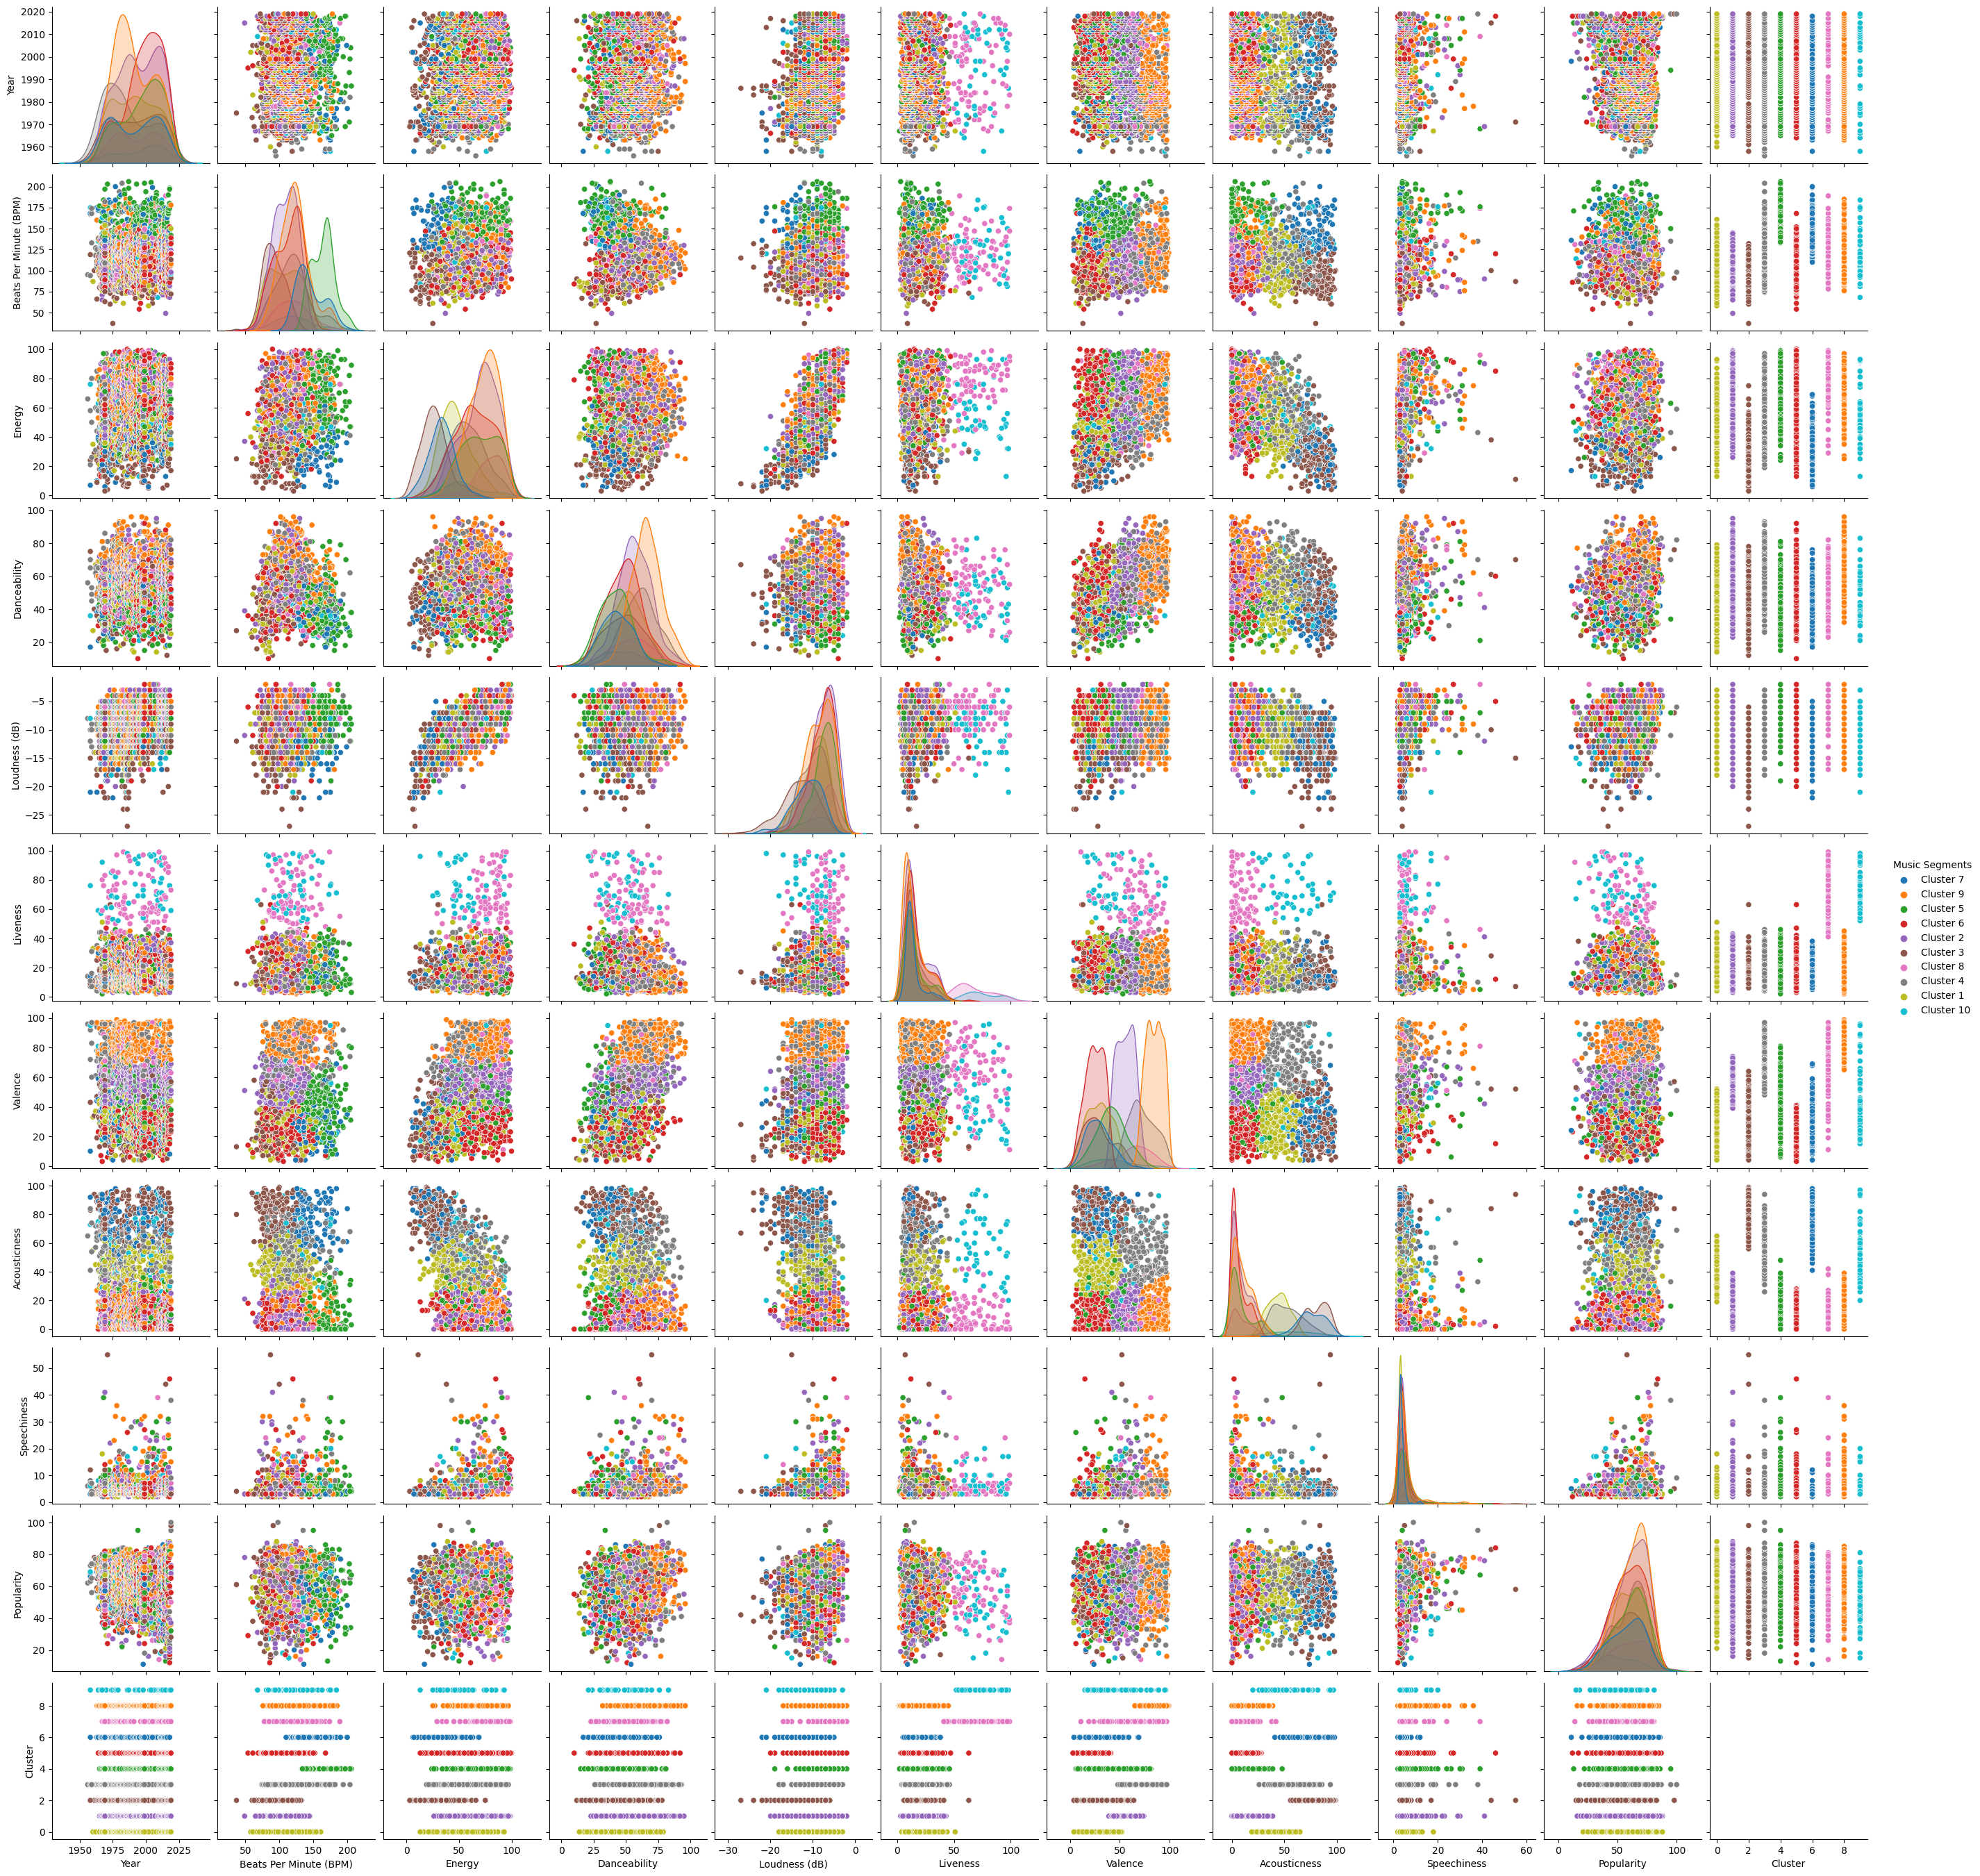

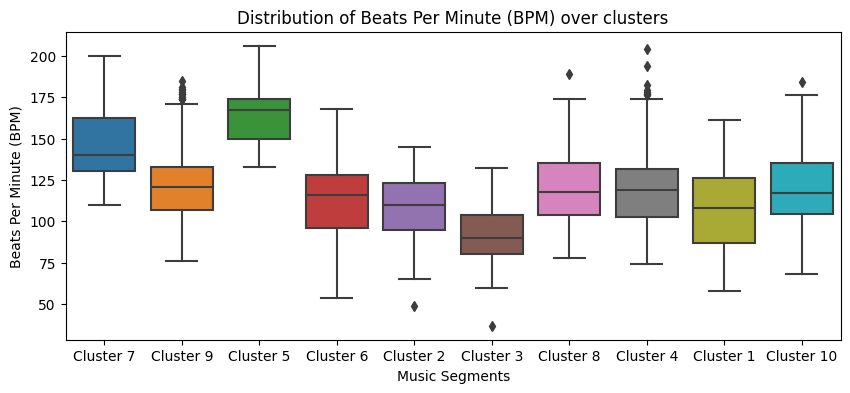

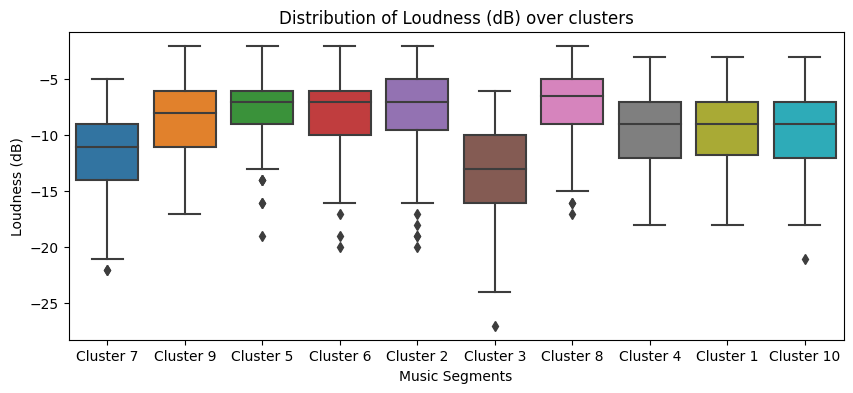

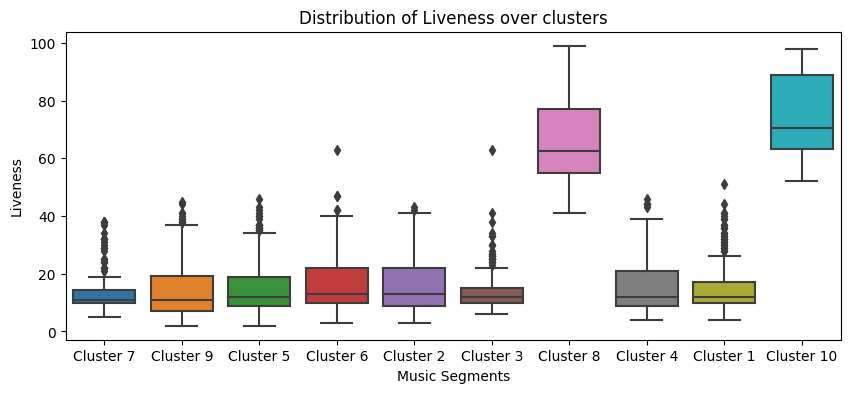

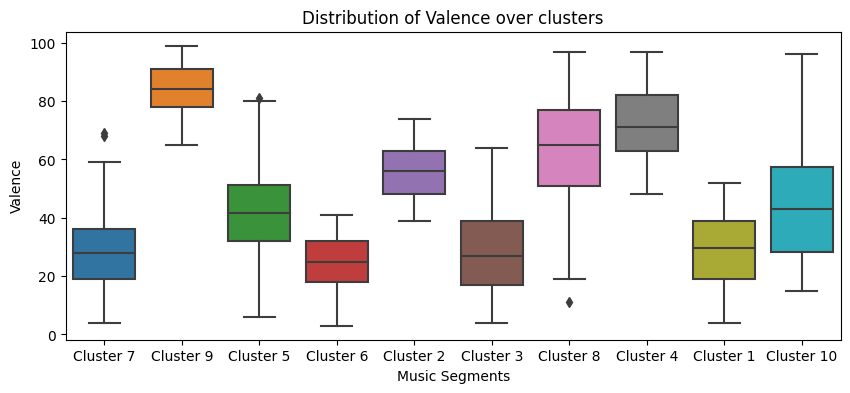

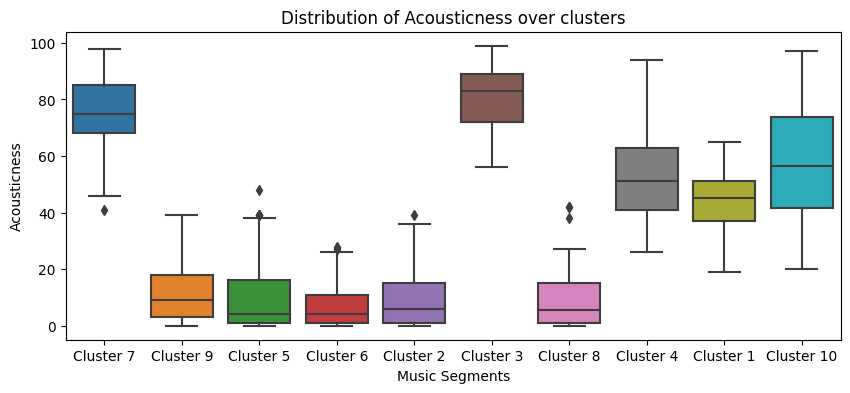

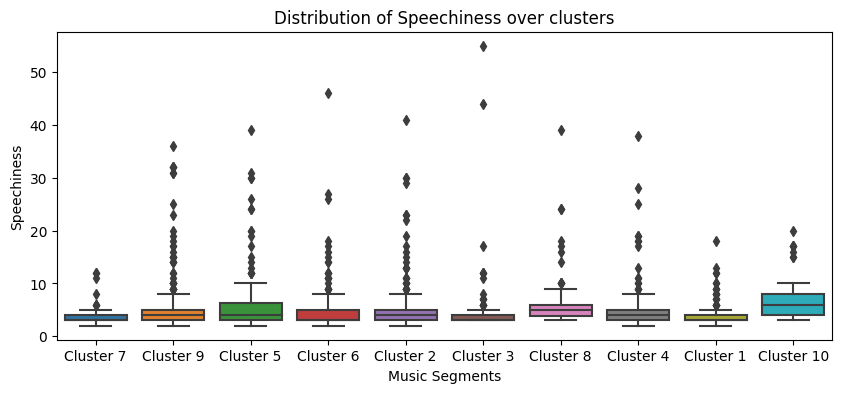

In [8]:
# Access the cluster centers
centroids = kmeans.cluster_centers_

# Print the centroids to see the mean value of each feature for each cluster
print(centroids)

# Create a DataFrame of the centroids for easier interpretation
centroids_df = pd.DataFrame(centroids, columns=data2.columns)

# Use descriptive statistics to profile the clusters
for i in range(kmeans.n_clusters):
    print(f"Cluster {i+1} stats:")
    print(data[data["Music Segments"] == f"Cluster {i+1}"].describe())

# Visualization (e.g., using seaborn or matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for visual inspection of clusters
sns.pairplot(data, hue="Music Segments")
plt.show()

# Boxplot for individual feature distribution across clusters
for col in data2.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x="Music Segments", y=col, data=data)
    plt.title(f"Distribution of {col} over clusters")
    plt.show()


##**Análisis**

Clúster 1:
Este clúster se caracteriza por tener música de una energía y valencia relativamente bajas, lo que podría indicar canciones más suaves o melancólicas. La acústica es notablemente alta, sugiriendo una tendencia hacia música más instrumental o menos producida electrónicamente. La popularidad media indica que estas canciones tienen una recepción decente.

Clúster 2:
Las canciones en este clúster tienden a tener un BPM y energía más altos, y una valencia moderada. La baja acústica puede indicar una producción más electrónica o menos orgánica. Este clúster también tiene una popularidad media similar al clúster 1.

Clúster 3:
Este clúster presenta un BPM y energía medios, pero una valencia muy baja, lo que podría significar que las canciones son menos alegres o positivas. La acústica y la popularidad son moderadas.

Clúster 4:
Con el BPM más alto de todos, este clúster podría representar canciones de géneros rápidos como el dance o electrónica. Sin embargo, la energía es baja, lo que es inusual para canciones de alto BPM. La acústica es muy alta, lo que sugiere elementos orgánicos o instrumentales a pesar de la velocidad.

Clúster 5:
Este grupo tiene una energía alta y una valencia alta, lo que podría indicar canciones animadas y alegres. Aunque la acústica es baja, la popularidad es moderada.

Clúster 6:
Este clúster se distingue por tener la energía más baja y una alta acústica, lo que podría asociarse con baladas o música clásica. La popularidad es ligeramente más baja comparada con los demás clústeres.

Clúster 7:
Las canciones aquí tienen una valencia muy alta, lo que sugiere un tono muy positivo y alegre. La acústica es media, lo que indica una mezcla de elementos orgánicos y electrónicos en la producción.

Clúster 8:
Este clúster es pequeño en cantidad y presenta una alta vivacidad, quizás implicando grabaciones en vivo o con audiencia. La valencia es moderada y la acústica es alta, lo que sugiere una fuerte presencia de elementos acústicos.

Clúster 9:
Con la valencia más alta de todos los clústeres, este grupo probablemente contiene las canciones más felices y enérgicas. El BPM es también elevado, lo que sugiere ritmos rápidos y bailables. Tiene la mayor popularidad media, lo que podría indicar un favoritismo en las tendencias actuales de escucha.

Clúster 10:
Este clúster destaca por tener el BPM más elevado después del clúster 4, pero con una energía y valencia moderadas. La popularidad es media, y la acústica es baja, lo que podría sugerir un estilo de música más orientado al baile pero menos extremo que el clúster 4.

Cada clúster revela un patrón distinto que puede corresponder a diferentes géneros o estilos musicales, y la interpretación precisa podría beneficiarse del conocimiento del contexto específico de las canciones.

   Beats Per Minute (BPM)  Loudness (dB)   Liveness    Valence  Acousticness  \
0               85.610000     -11.645000  14.945000  30.170000     72.475000   
1              130.184783      -7.974638  16.833333  79.402174      9.518116   
2              129.656958      -7.831715  15.695793  30.718447      8.893204   
3              127.455556     -11.433333  15.950000  26.111111     69.066667   
4              116.882353      -7.960784  72.617647  56.931373     21.078431   
5              117.240642      -9.807487  16.181818  70.604278     53.213904   
6              171.879310      -7.724138  17.149425  48.425287     10.321839   
7               91.217021      -8.361702  17.225532  32.421277     13.774468   
8              100.192157      -8.337255  14.317647  70.584314     11.184314   
9              169.907895     -11.500000  18.921053  43.763158     69.144737   

   Speechiness  
0     4.430000  
1     5.250000  
2     4.699029  
3     3.688889  
4     6.382353  
5     4.786096  


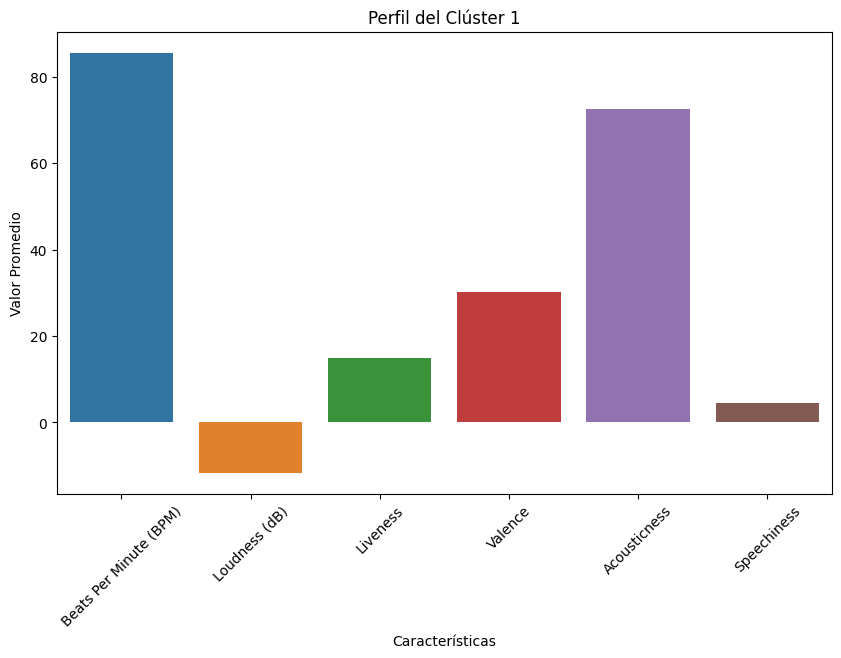

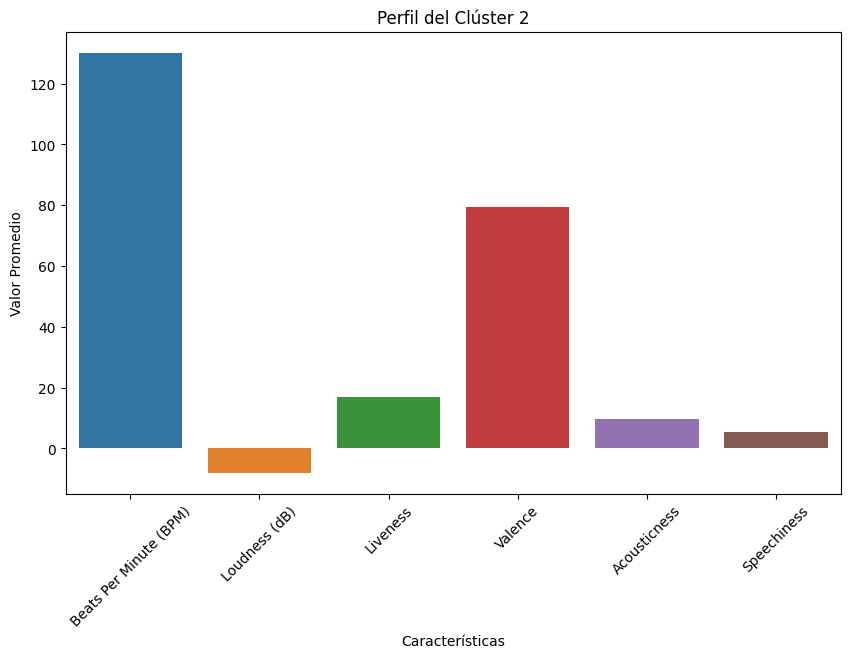

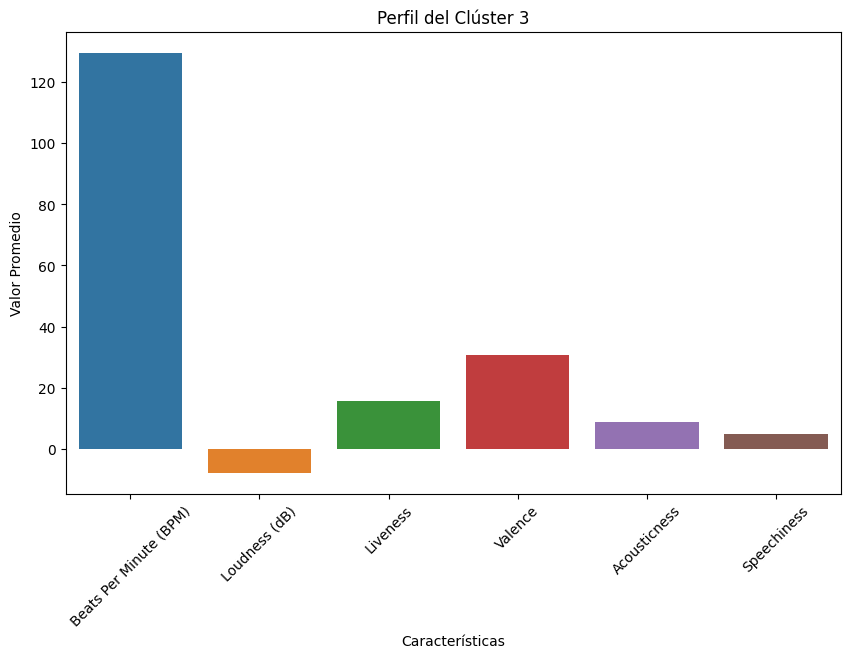

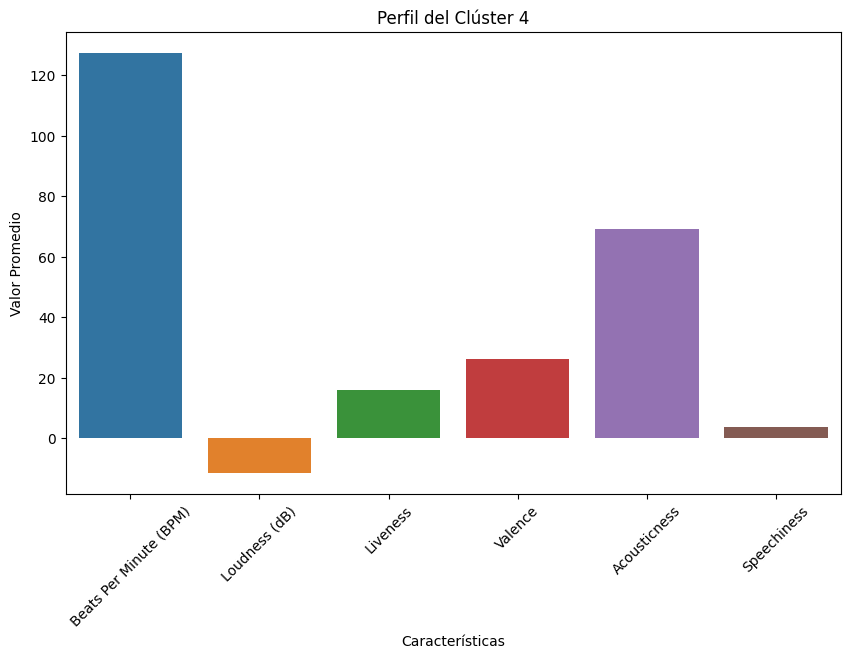

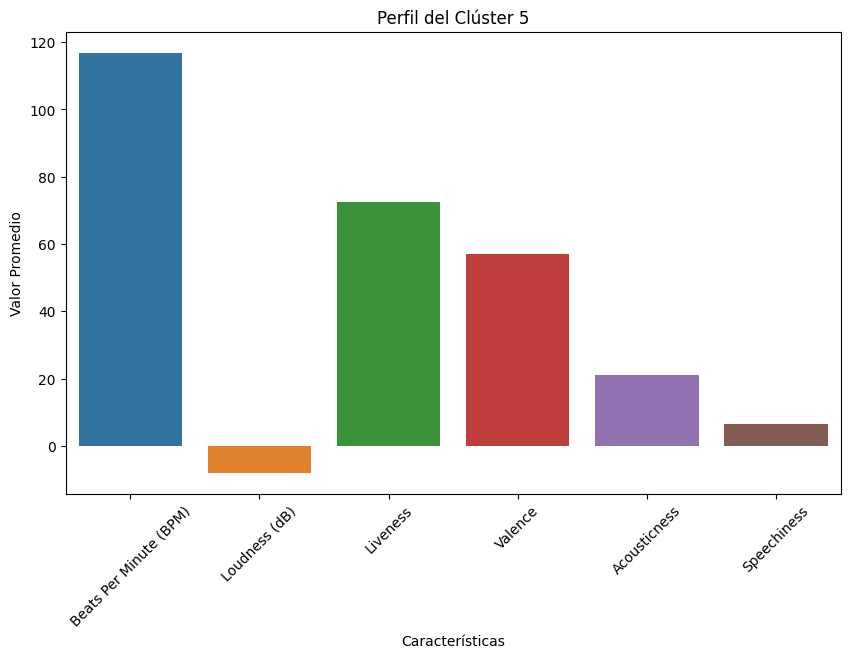

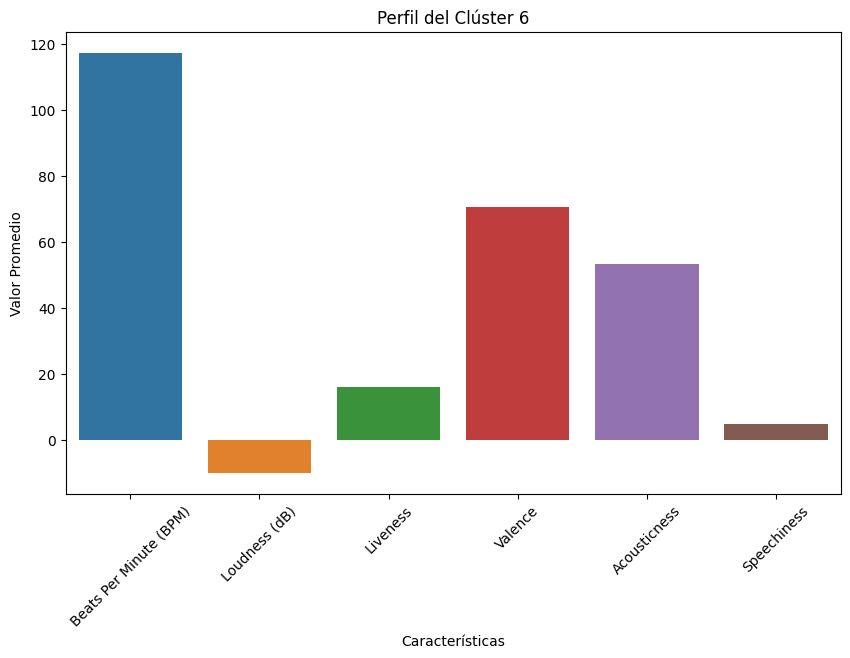

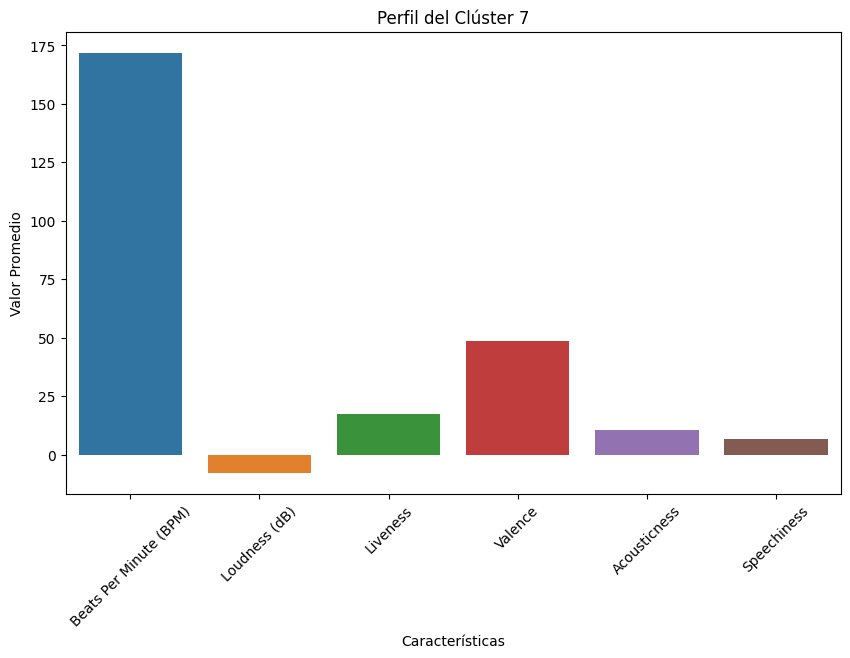

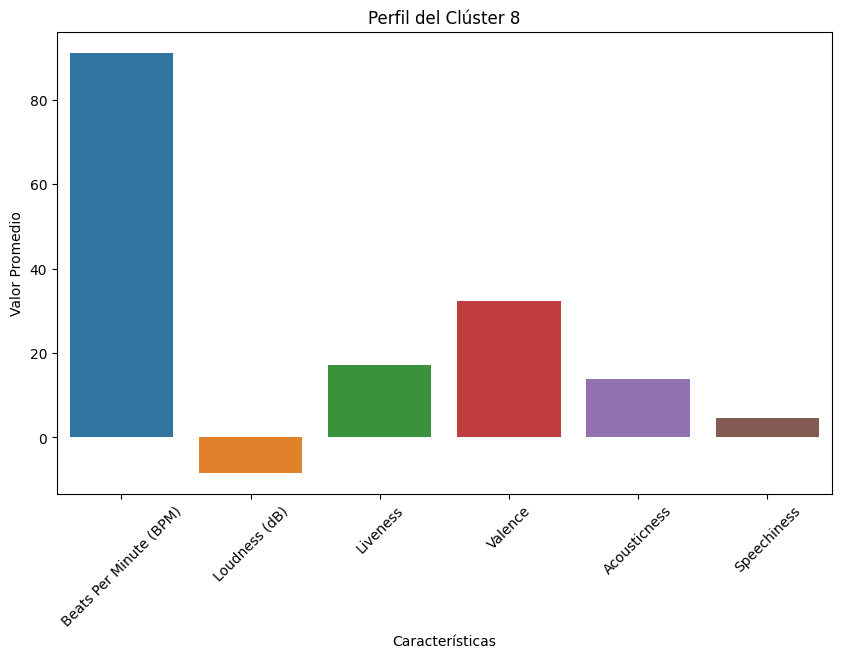

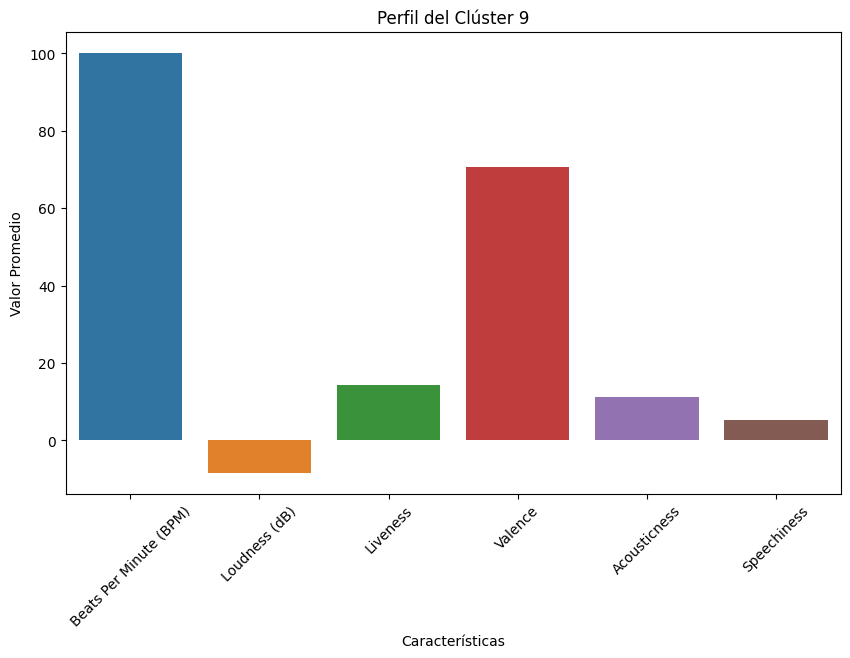

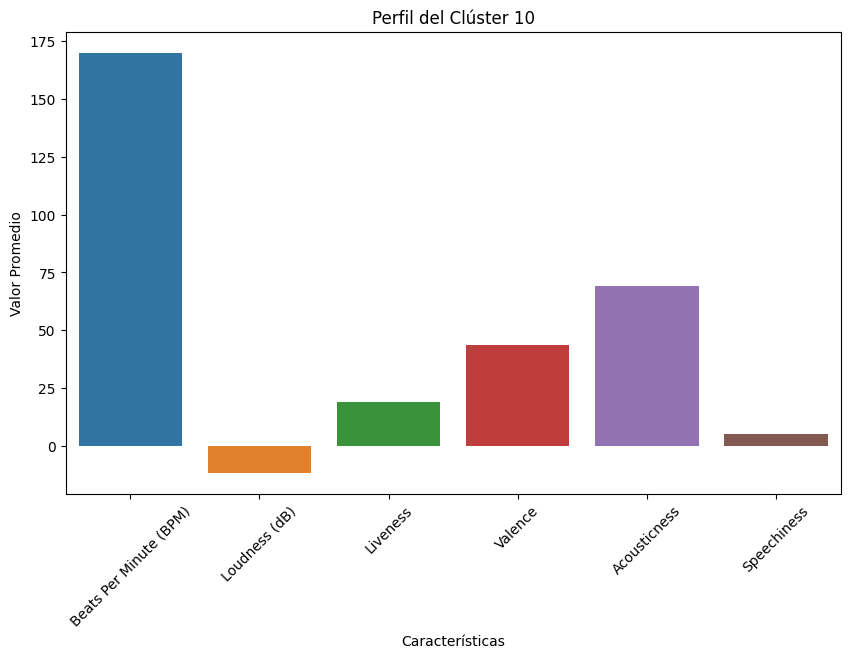

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'some_data' es tu DataFrame con los datos a clusterizar.
# Reemplaza 'some_data' con el nombre real de tu DataFrame.
some_data = data2  # Reemplaza con el nombre de tu DataFrame de datos.

# Crea la instancia de KMeans y ajusta el modelo a tus datos.
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
clusters = kmeans.fit_predict(some_data)

# Ahora 'kmeans' está definido y se puede acceder a 'kmeans.cluster_centers_'.
centroids = kmeans.cluster_centers_

# Crear un DataFrame para los centroides para facilitar la interpretación.
centroids_df = pd.DataFrame(centroids, columns=some_data.columns)

# Imprimir los centroides para ver el valor promedio de cada característica por clúster.
print(centroids_df)

# Visualizar los centroides usando gráficos de barras para cada clúster.
for i in range(len(centroids_df)):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=centroids_df.columns, y=centroids_df.iloc[i, :])
    plt.title(f'Perfil del Clúster {i+1}')
    plt.xticks(rotation=45)
    plt.xlabel('Características')
    plt.ylabel('Valor Promedio')
    plt.show()


Los resultados mostrados son los centroides de 10 clústeres diferentes obtenidos mediante el algoritmo K-Means. Cada clúster se caracteriza por los valores promedio de las características de las canciones, como el tempo (Beats Per Minute), la sonoridad (Loudness), la vivacidad (Liveness), la valencia (Valence), la acústica (Acousticness) y la locuacidad (Speechiness). Aquí está el análisis de lo que podría significar cada clúster:

Clúster 1:
Este clúster tiene un tempo relativamente lento con un valor promedio de 85.61 BPM y una sonoridad baja, lo que podría indicar canciones suaves o baladas. La alta acústica sugiere una fuerte presencia de elementos orgánicos o instrumentales, y una valencia y locuacidad bajas podrían reflejar un tono más serio o melancólico en la música.

Clúster 2:
Las canciones de este clúster tienen un tempo rápido (130.18 BPM) y son bastante sonoras. Una valencia muy alta indica que son temas alegres y positivos. La acústica es baja, lo que sugiere una producción más electrónica o pop.

Clúster 3:
Similar al clúster 2 en cuanto a tempo y sonoridad, pero con una valencia mucho más baja, este clúster podría incluir música con un ritmo rápido pero con letras o tonalidades más melancólicas o menos alegres.

Clúster 4:
Este grupo también presenta un tempo rápido, pero con una sonoridad y valencia bajas, lo que podría indicar canciones intensas con un tono más oscuro o melancólico. La alta acústica podría apuntar a un uso significativo de instrumentos acústicos.

Clúster 5:
Con una vivacidad excepcionalmente alta, este clúster podría representar grabaciones en vivo o canciones con una fuerte presencia de audiencia. Tiene un tempo moderado y una valencia intermedia, con una acústica moderada.

Clúster 6:
Este clúster tiene un tempo medio y una sonoridad baja. La alta valencia sugiere canciones alegres, y la acústica notablemente alta podría implicar un estilo más tradicional o acústico.

Clúster 7:
Con el tempo más alto (171.88 BPM), este clúster probablemente contiene canciones muy rápidas, posiblemente de géneros como el dance o la música electrónica. La valencia y la locuacidad son moderadas, y la acústica es baja.

Clúster 8:
Este clúster tiene el tempo más lento después del clúster 1, con una valencia baja y una sonoridad moderada. La acústica y la locuacidad son ligeramente más altas que en otros clústeres con tempos lentos, lo que podría sugerir música hablada o con un enfoque lírico.

Clúster 9:
Con un tempo cerca de 100 BPM y una alta valencia, este clúster parece incluir canciones que son moderadamente rápidas y muy positivas. La acústica y la locuacidad son bajas, lo que podría indicar un estilo más refinado y menos orgánico.

Clúster 10:
Este clúster comparte un tempo elevado con el clúster 7 pero tiene una alta acústica y una valencia intermedia. Esto podría indicar una combinación de música rápida con elementos acústicos, como puede ser el caso de ciertos tipos de música folk rápida o ciertas formas de rock acústico.

Cada clúster, por tanto, parece representar diferentes tipos de música, desde canciones rápidas y alegres hasta baladas lentas y acústicas, pasando por temas con tonalidades más melancólicas o serias.

##**¿Y esto para qué?**

Con estos resultados, Spotify podría llegar a varias conclusiones que podrían utilizarse para mejorar su algoritmo de recomendación:

Segmentación de Audiencia:
Los clústeres reflejan diferentes preferencias y estados de ánimo de los oyentes. Spotify podría usar esta segmentación para afinar sus recomendaciones, asegurándose de que se alineen con el perfil de escucha de cada usuario.

Playlists Personalizadas:
Crear listas de reproducción basadas en los centroides de los clústeres puede ayudar a los usuarios a descubrir música que coincide con un estado de ánimo o estilo particular, como canciones tranquilas y acústicas o pistas rápidas y enérgicas.

Descubrimiento de Nuevos ritmos:
Al identificar qué clústeres prefieren los usuarios, Spotify puede recomendar canciones de clústeres similares que el usuario aún no ha explorado, fomentando el descubrimiento de nuevos artistas y géneros.

Análisis de Tendencias:
Los datos de los clústeres pueden revelar tendencias en las preferencias de los oyentes a lo largo del tiempo. Spotify puede rastrear cómo cambian las características de los clústeres más populares y responder con recomendaciones que reflejen esas tendencias.

Optimización de Búsqueda:
Los clústeres pueden mejorar la función de búsqueda permitiendo a los usuarios buscar por características de música más abstractas o basadas en el ánimo, como "música acústica energética" o "baladas tranquilas".

Marketing y Promociones:
Spotify puede usar la información de los clústeres para dirigir campañas de marketing para lanzamientos de nuevos álbumes o promociones que se alineen con las preferencias de escucha de sus usuarios.

Mejora de Metadatos:
Al analizar los clústeres, Spotify puede identificar posibles errores o insuficiencias en los metadatos de las canciones, como géneros mal etiquetados o características que no se ajustan a la norma.

Feedback a Creadores de Contenido:
Proporcionar retroalimentación a los artistas y productores sobre qué características de sus canciones están resonando con los oyentes, permitiéndoles ajustar su producción musical si así lo desean.

Adaptabilidad Contextual:
Los algoritmos de recomendación podrían adaptarse según el contexto de escucha del usuario (por ejemplo, relajación, ejercicio, trabajo) utilizando los perfiles de clústeres para recomendar música que se ajuste a la actividad actual del usuario.

En resumen, estos resultados brindan una oportunidad para que Spotify mejore la precisión de sus recomendaciones, personalice la experiencia del usuario, y optimice su catálogo y estrategias de marketing basándose en un análisis detallado y matizado de las preferencias musicales.